In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import xarray as xr
import pygrib
import cartopy as cp

In [2]:
ds = xr.open_dataset('MRMS_data_2019_05_16/MRMS_MESH_2000_2100.nc')

In [3]:
extent_data = [230,300,55,20]
extent_us_zoom = [230,300,49,20]
extent_midwest_zoom = [265,280,45,35]
states_provinces = cp.feature.NaturalEarthFeature(category='cultural',name='admin_1_states_provinces_lines',scale='50m',facecolor='none')

In [4]:
mesh = ds.unknown
mesh.values = (mesh.values > 0)*mesh.values

In [5]:
minutes_list = [10]#[10,30,60]
size_list = [6] #[6,2,1]
#agg_types = ['Maximum','rawAvg','boolMax','boolAvg','presentAvg']
zoom_types = ['CONUS','midwest']
zoom_extents = [extent_us_zoom,extent_midwest_zoom]
timestring_10 = ['2000 UTC - 2010 UTC', '2010 UTC - 2020 UTC', '2020 UTC - 2030 UTC', '2030 UTC - 2040 UTC', '2040 UTC - 2050 UTC', '2050 UTC - 2100 UTC']
timestring_30 = ['2000 UTC - 2030 UTC', '2030 UTC - 2100 UTC']
timestring_60 = ['2000 UTC - 2100 UTC']
timestring = [timestring_10,timestring_30,timestring_60]

In [6]:
cbar_max = mesh.values.max()
cbar_max

88.9

### Maximum MESH

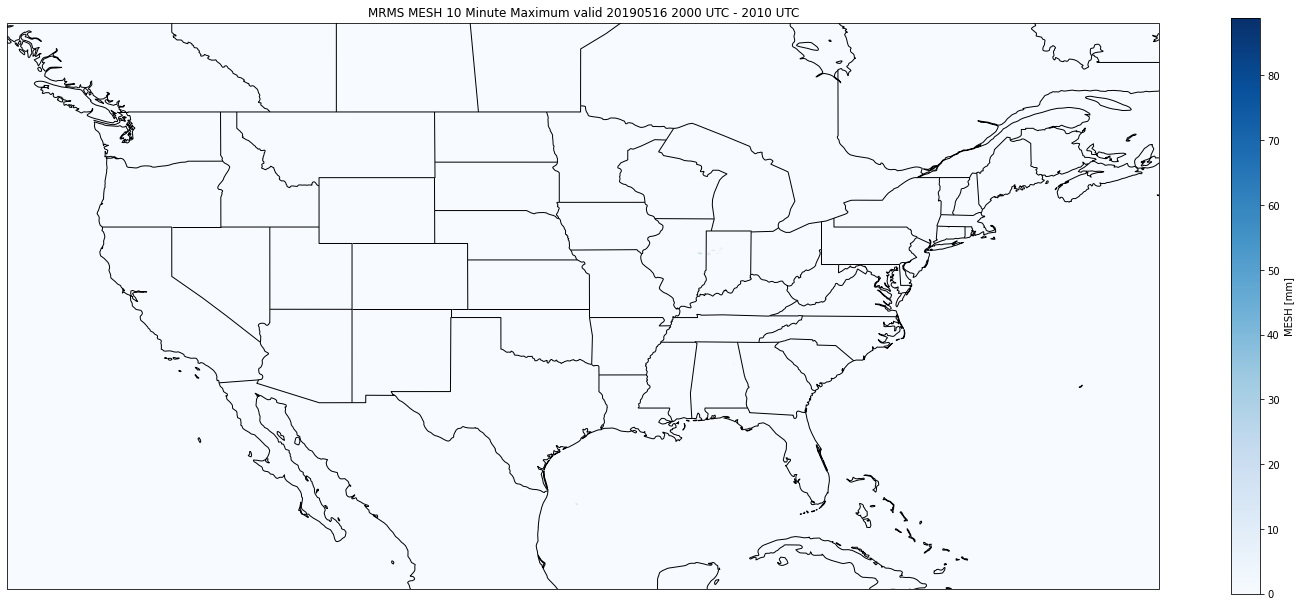

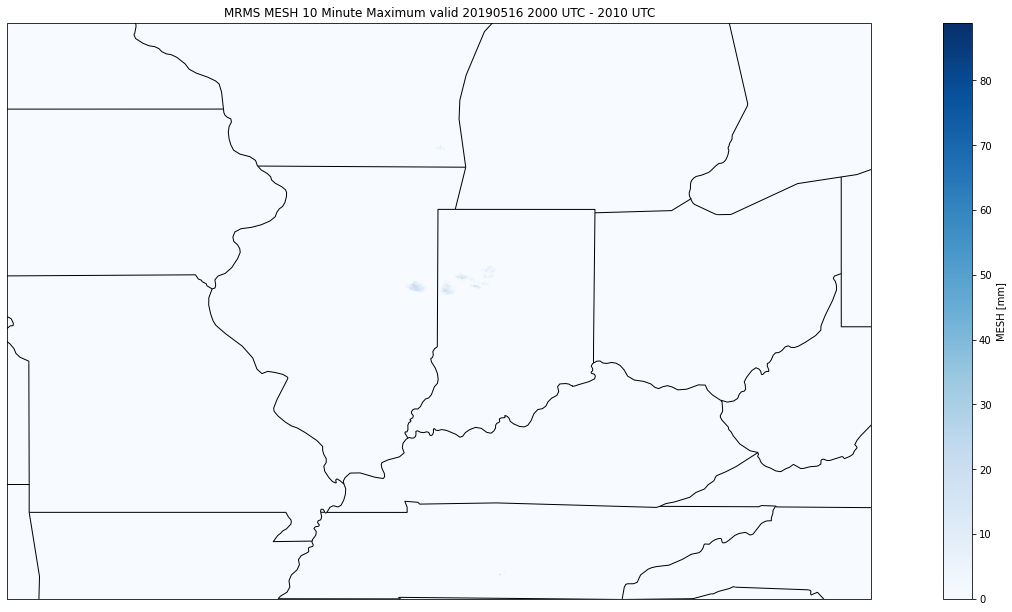

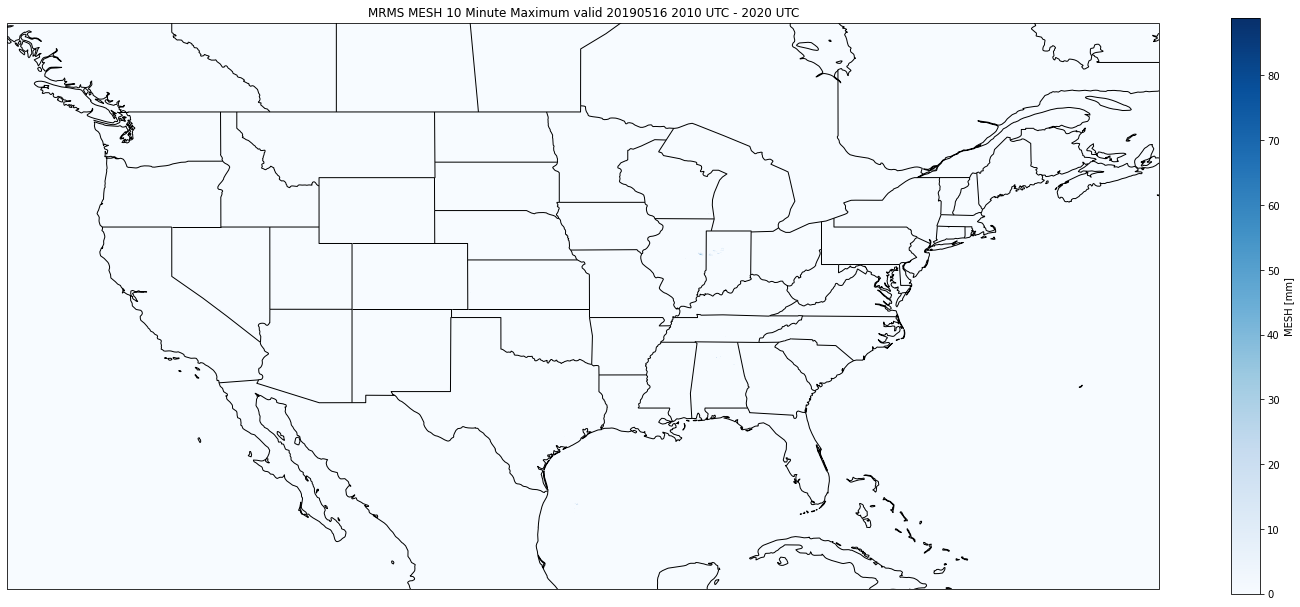

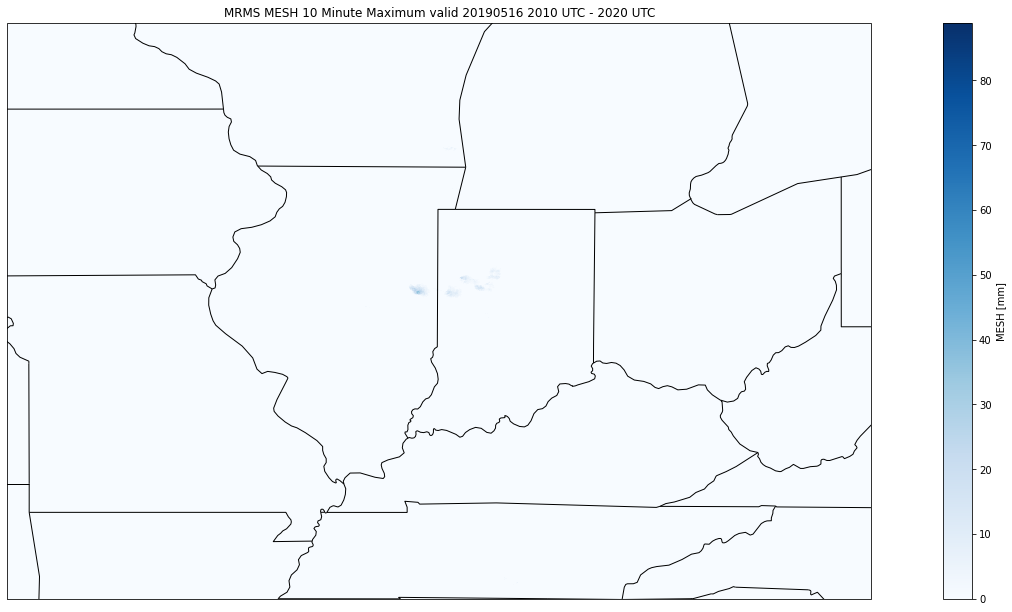

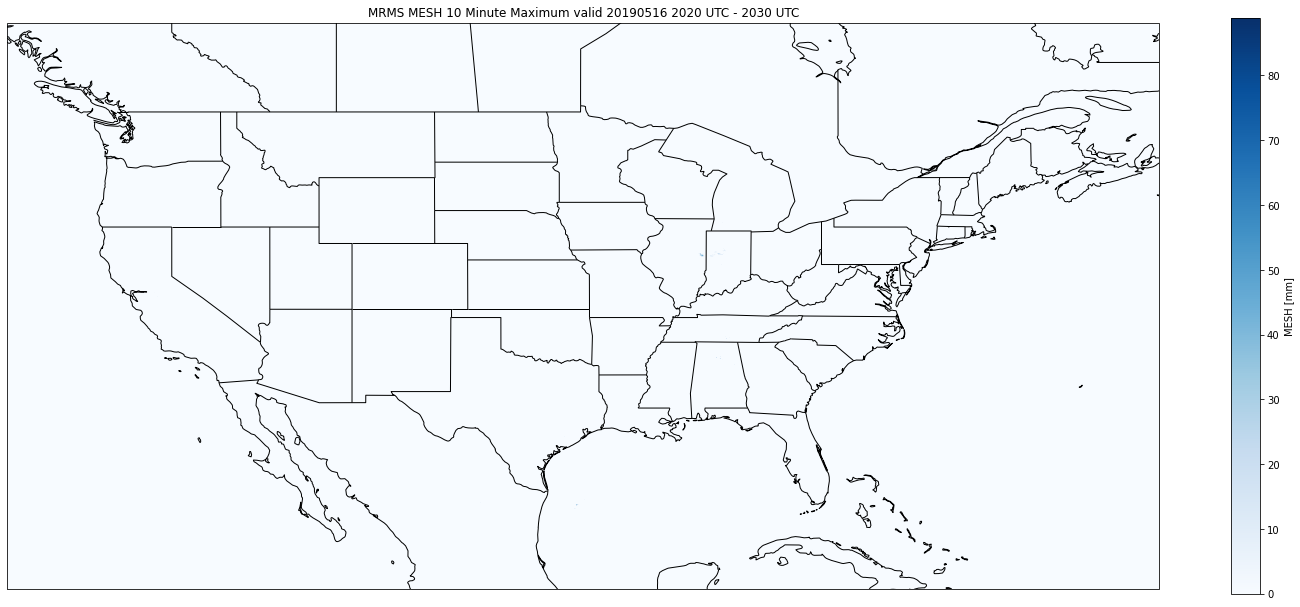

In [ ]:
for i in range(len(size_list)):
    mins = minutes_list[i]
    size = size_list[i]
    
    #maximum
    mesh_max = mesh.coarsen(valid_time=int(mins/2),coord_func='max').max()
    for time in range(size):
        for z in range(len(zoom_types)):
            zoom = zoom_types[z]
            zoom_extent = zoom_extents[z]
            
            fig = plt.figure()
            fig.set_size_inches(20,8)
            ax = plt.axes([0.,0.,1,1], projection=ccrs.PlateCarree())
            ax.add_feature(cp.feature.BORDERS)
            ax.add_feature(cp.feature.COASTLINE)
            ax.add_feature(states_provinces)
            ax.set_extent(zoom_extent)
            
            plot = ax.pcolormesh(mesh_max.longitude,
                                 mesh_max.latitude,
                                 mesh_max.isel(valid_time=time).values,
                                 cmap="Blues",
                                 vmin=0,
                                 vmax=cbar_max,
                                 transform=ccrs.PlateCarree())
            
            colbar = plt.colorbar(plot,orientation='vertical')
            colbar.set_label('MESH [mm]',rotation='vertical',fontsize='medium')
            
            titlestr = 'MRMS MESH ' + str(mins) + ' Minute Maximum valid 20190516 ' + timestring[i][time]
            ax.set_title(titlestr, fontsize='large')
            
            plt.savefig("2019_05_16_figures/MESH_Maximum_" + zoom + '_' + str(mins) + '.' + str(time) + '_Minute_test.png',bbox_inches='tight')

### Average MESH

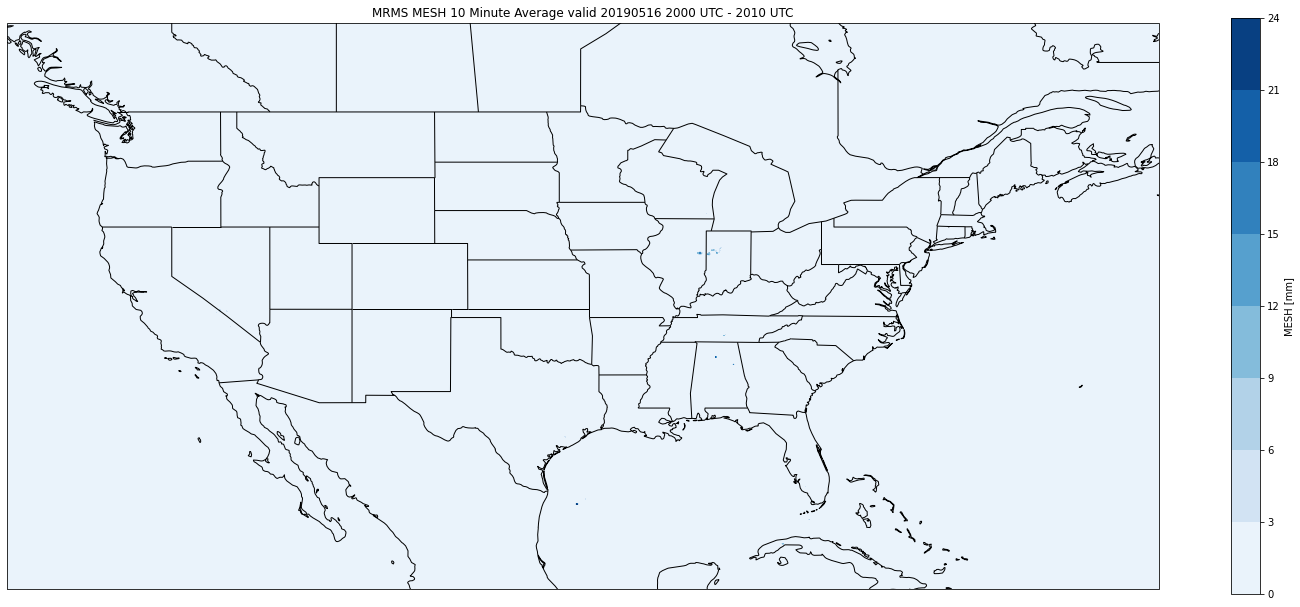

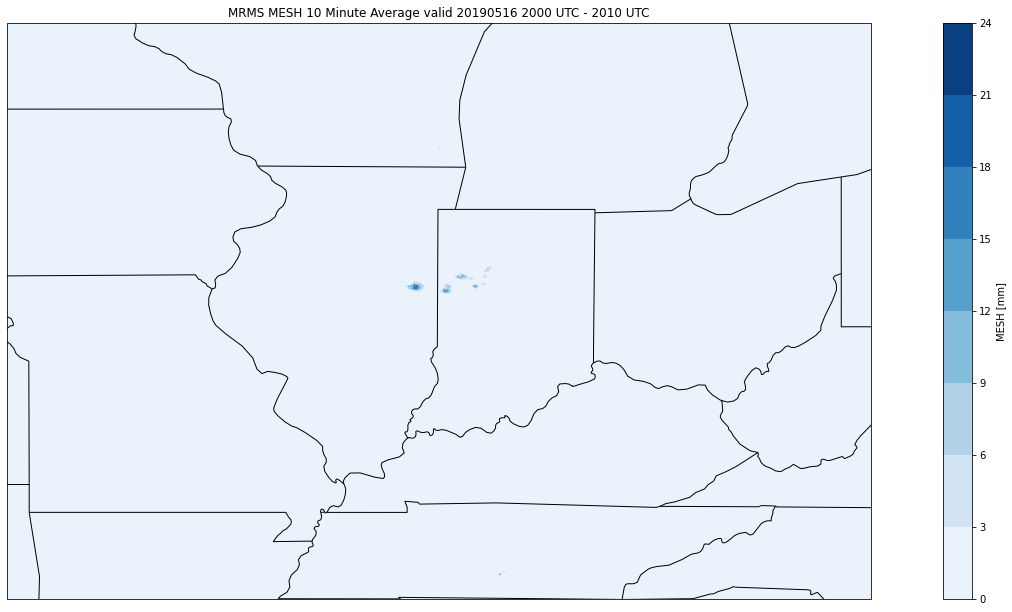

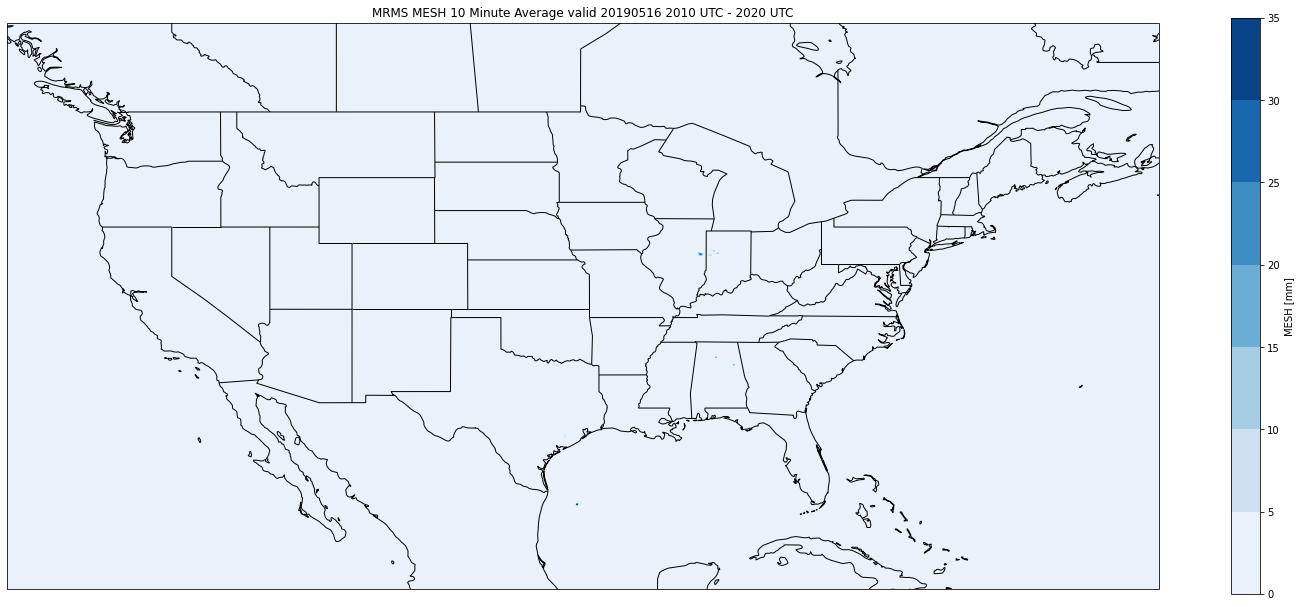

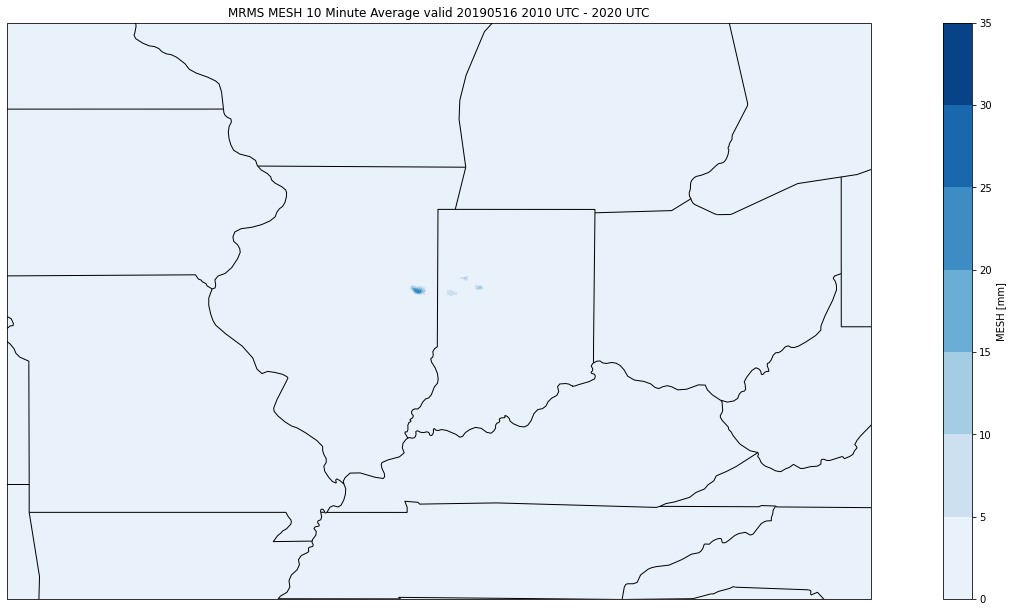

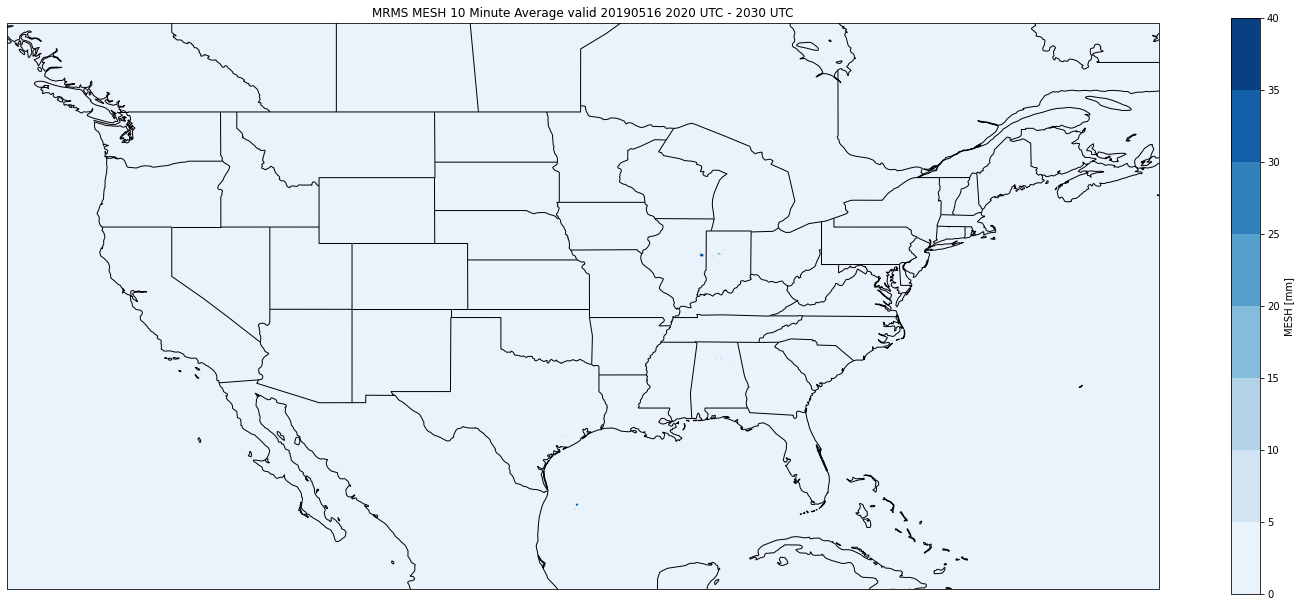

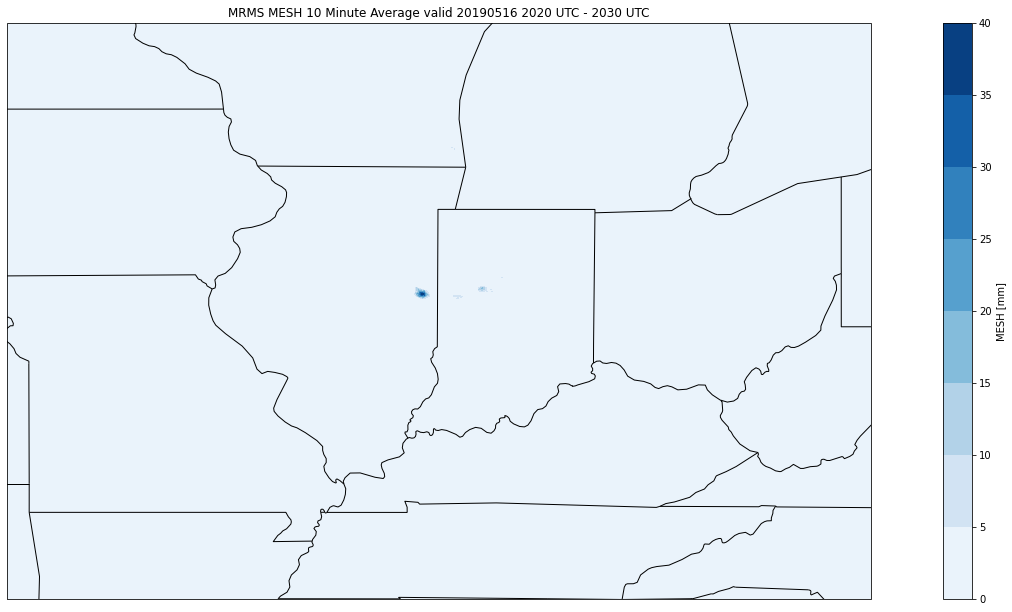

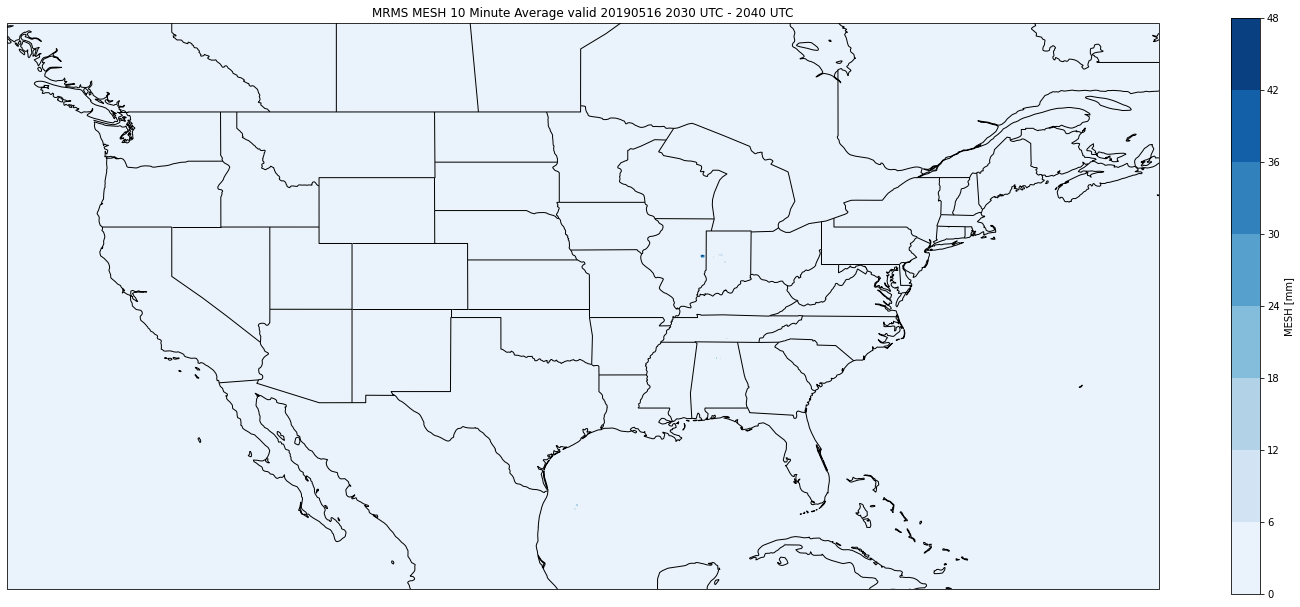

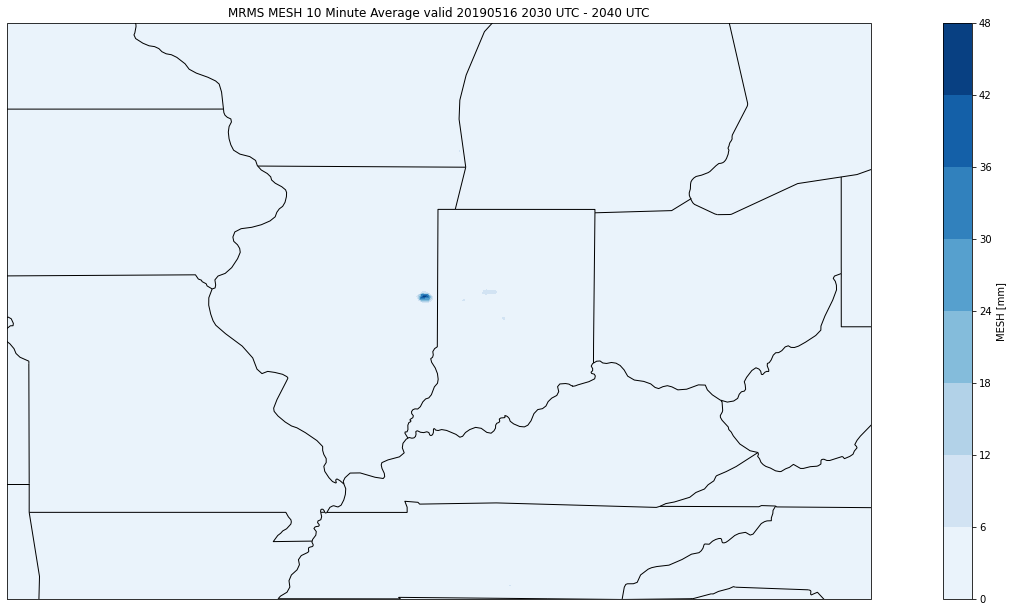

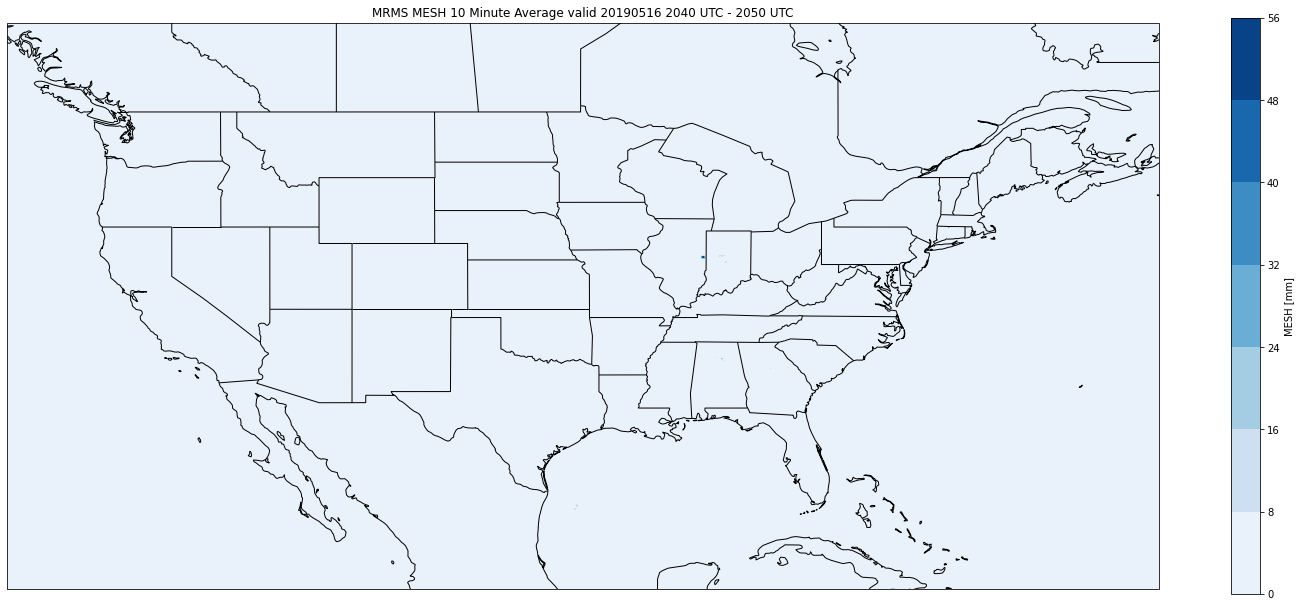

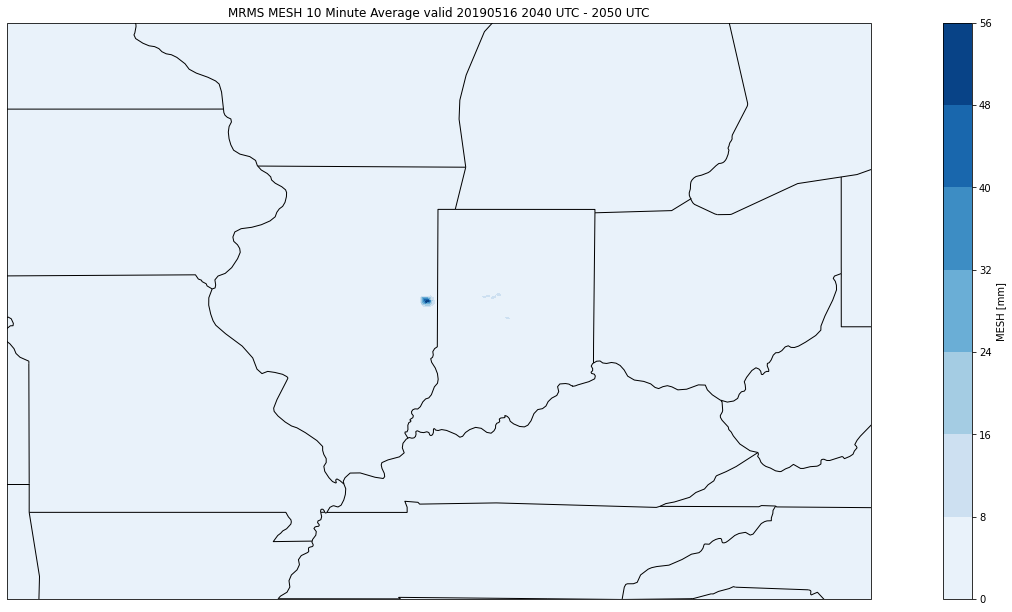

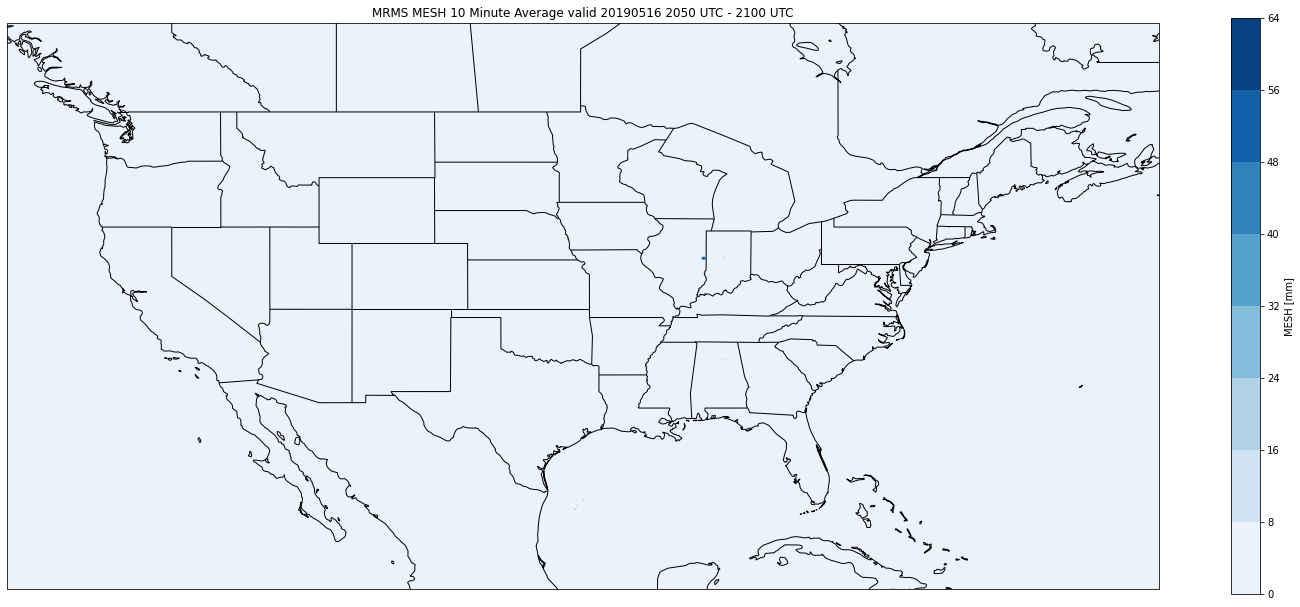

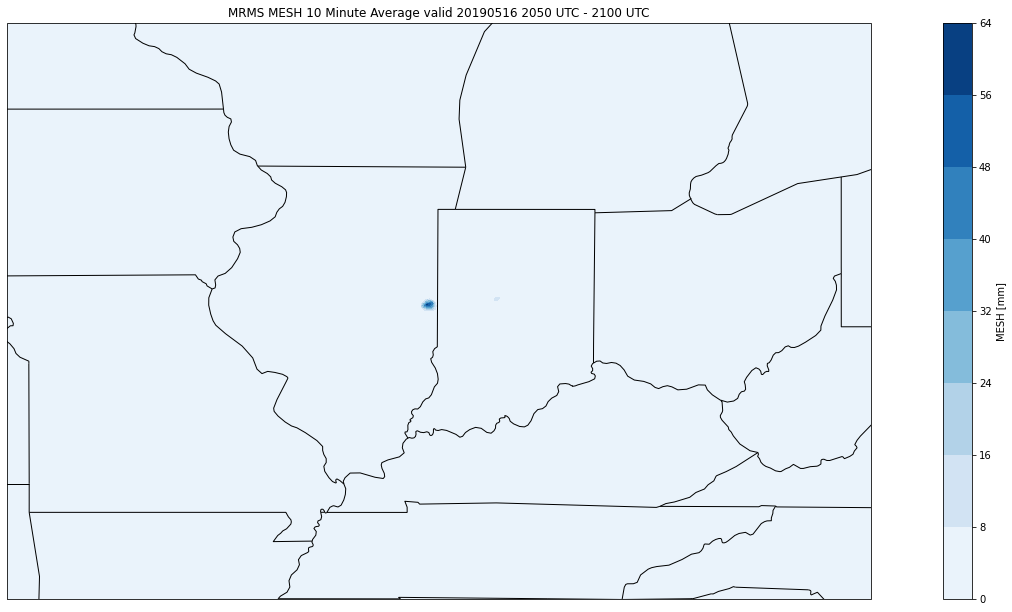

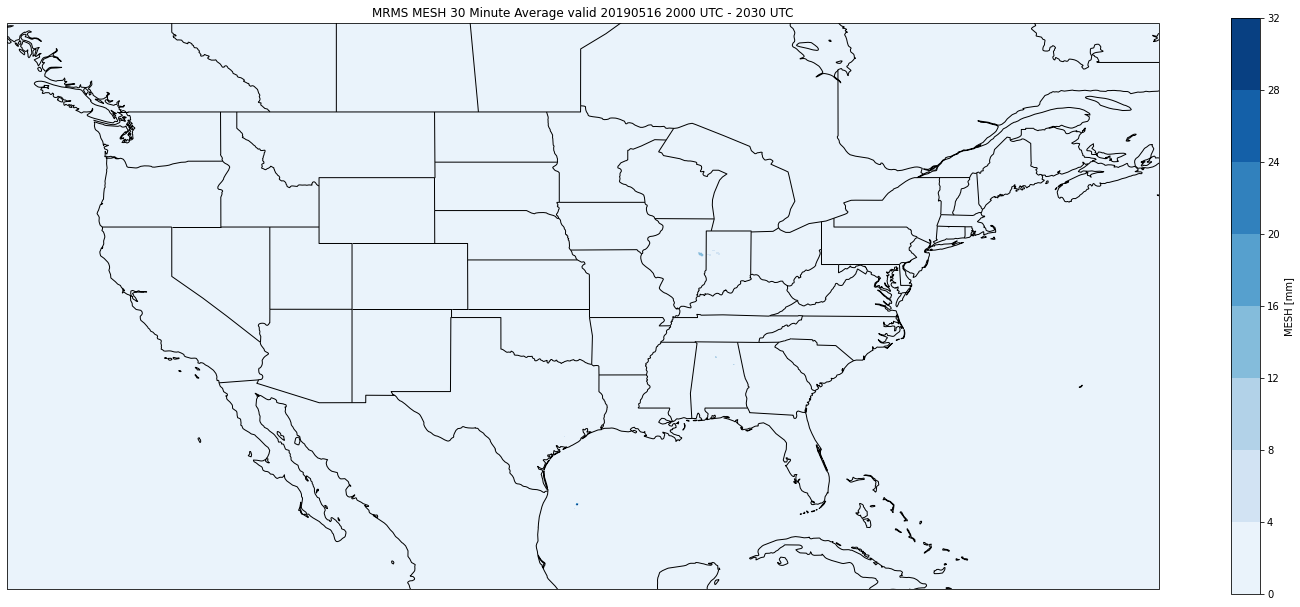

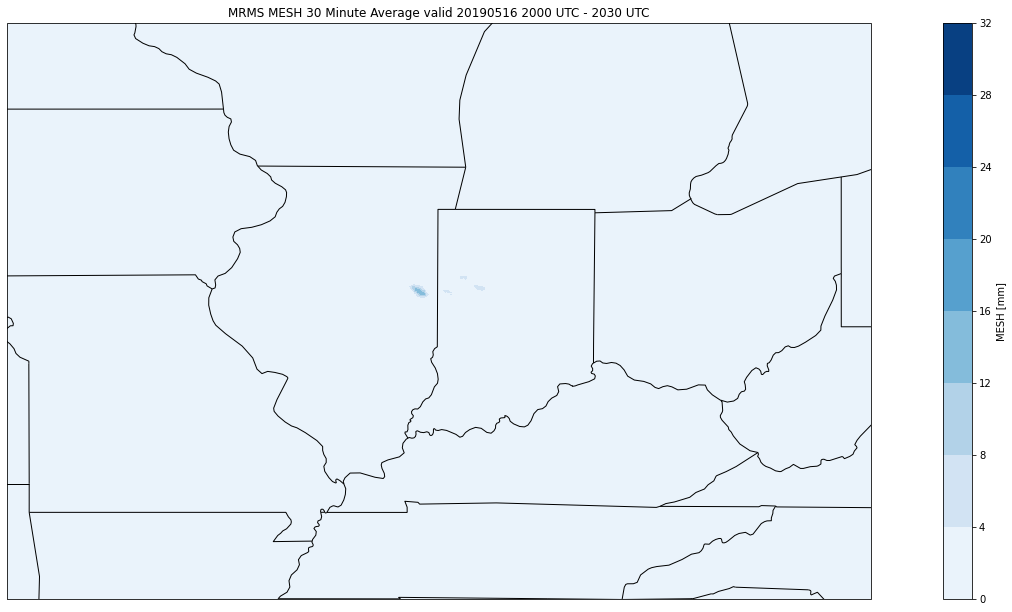

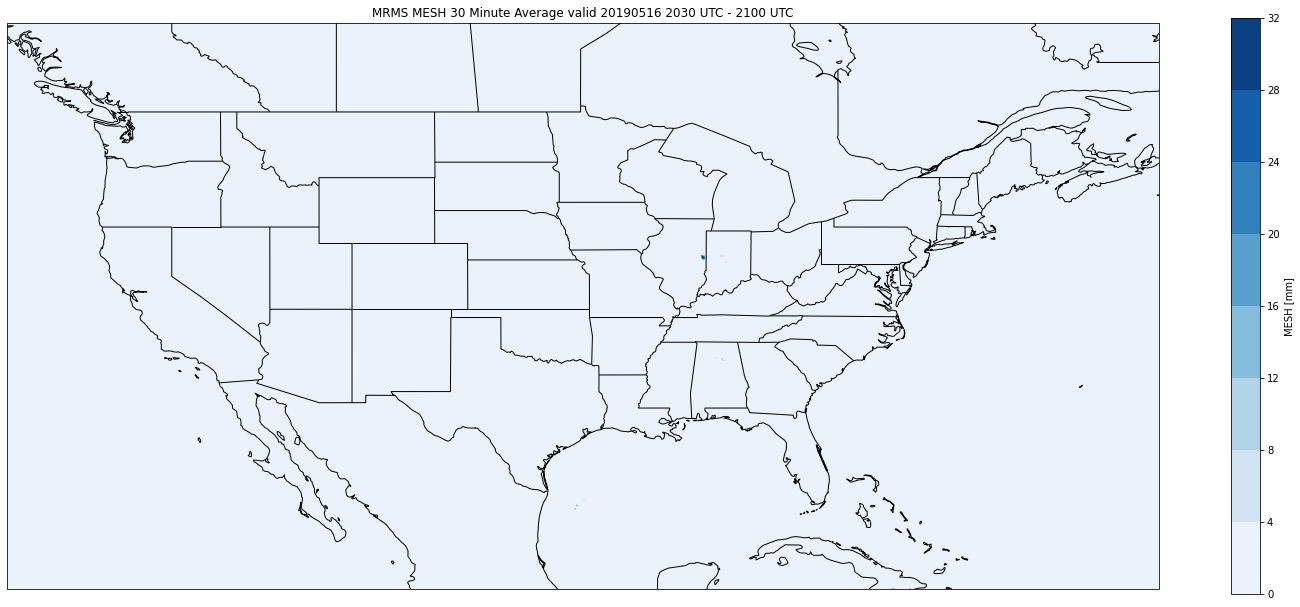

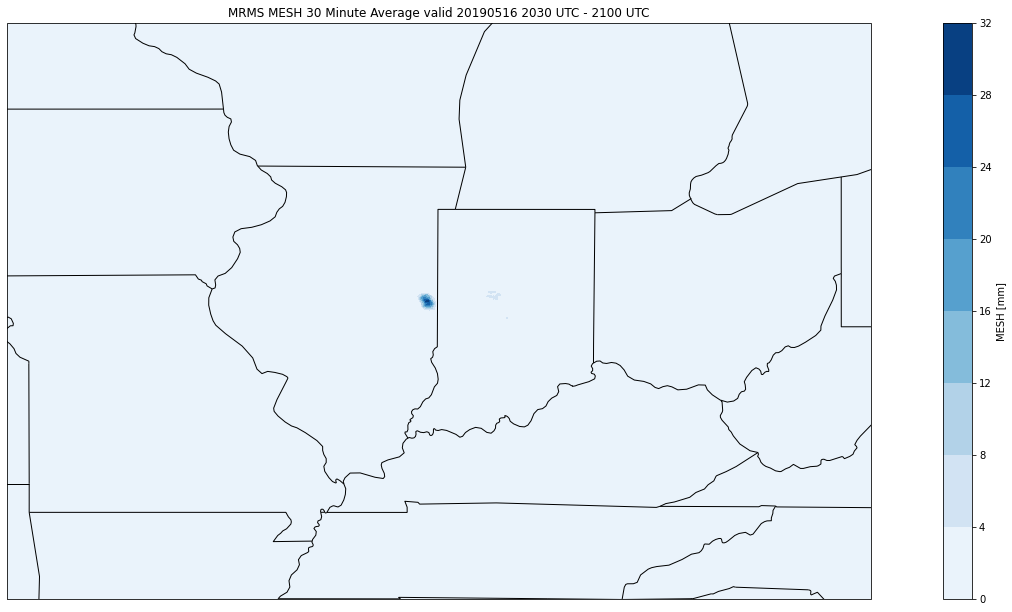

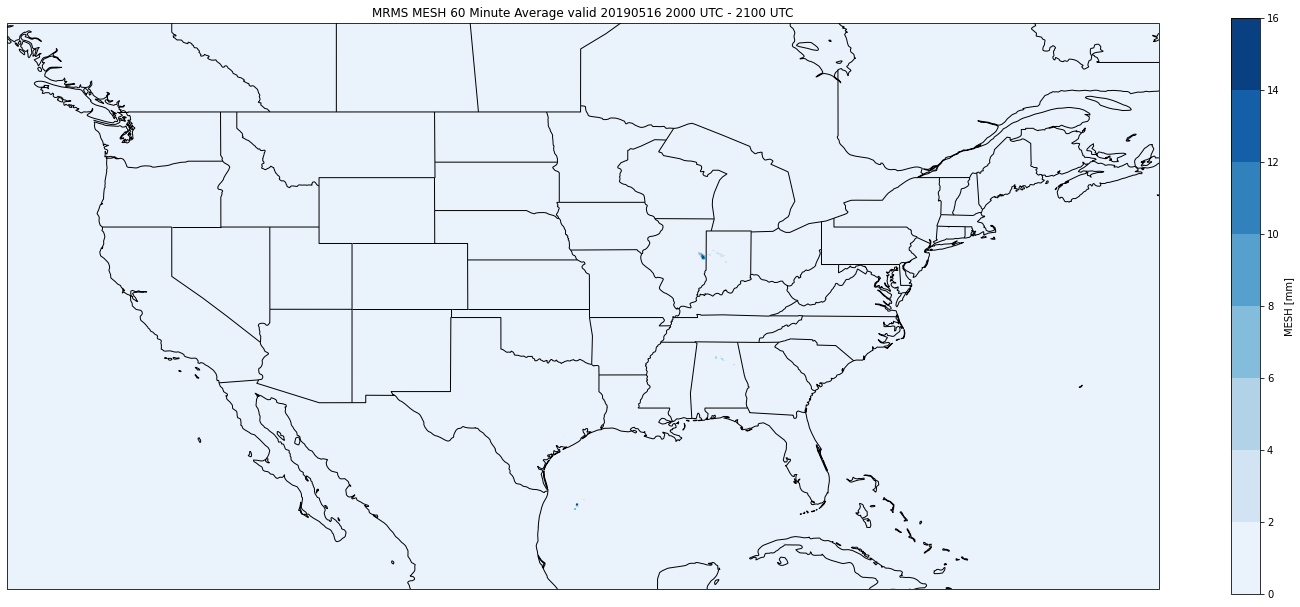

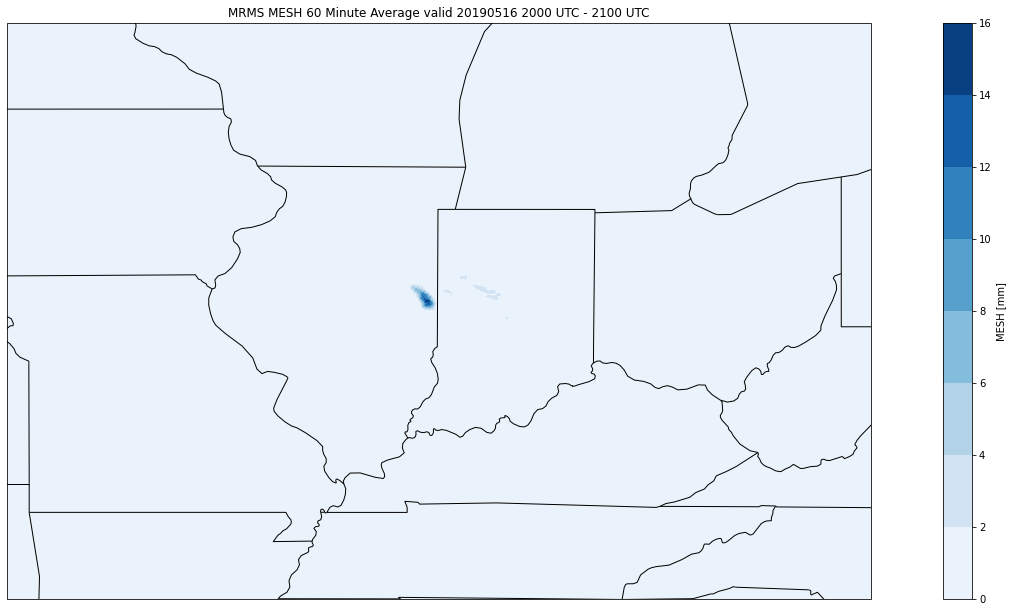

In [8]:
for i in range(len(size_list)):
    mins = minutes_list[i]
    size = size_list[i]
    
    #maximum
    mesh_avg = mesh.coarsen(valid_time=int(mins/2),coord_func='mean').mean()
    for time in range(size):
        for z in range(len(zoom_types)):
            zoom = zoom_types[z]
            zoom_extent = zoom_extents[z]
            
            fig = plt.figure()
            fig.set_size_inches(20,8)
            ax = plt.axes([0.,0.,1,1], projection=ccrs.PlateCarree())
            ax.add_feature(cp.feature.BORDERS)
            ax.add_feature(cp.feature.COASTLINE)
            ax.add_feature(states_provinces)
            ax.set_extent(zoom_extent)
            
            plot = ax.contourf(mesh_avg.longitude,
                               mesh_avg.latitude,
                               mesh_avg.isel(valid_time=time).values,
                               cmap="Blues",
                               vmax=cbar_max,
                               vmin=0,
                               transform=ccrs.PlateCarree())
            
            colbar = plt.colorbar(plot,orientation='vertical')
            colbar.set_label('MESH [mm]',rotation='vertical',fontsize='medium')
            
            titlestr = 'MRMS MESH ' + str(mins) + ' Minute Average valid 20190516 ' + timestring[i][time]
            ax.set_title(titlestr, fontsize='large')
            
            plt.savefig("2019_05_16_figures/MESH_Average_" + zoom + '_' + str(mins) + '.' + str(time) + '_Minute_test.png',bbox_inches='tight')

### Bool MESH

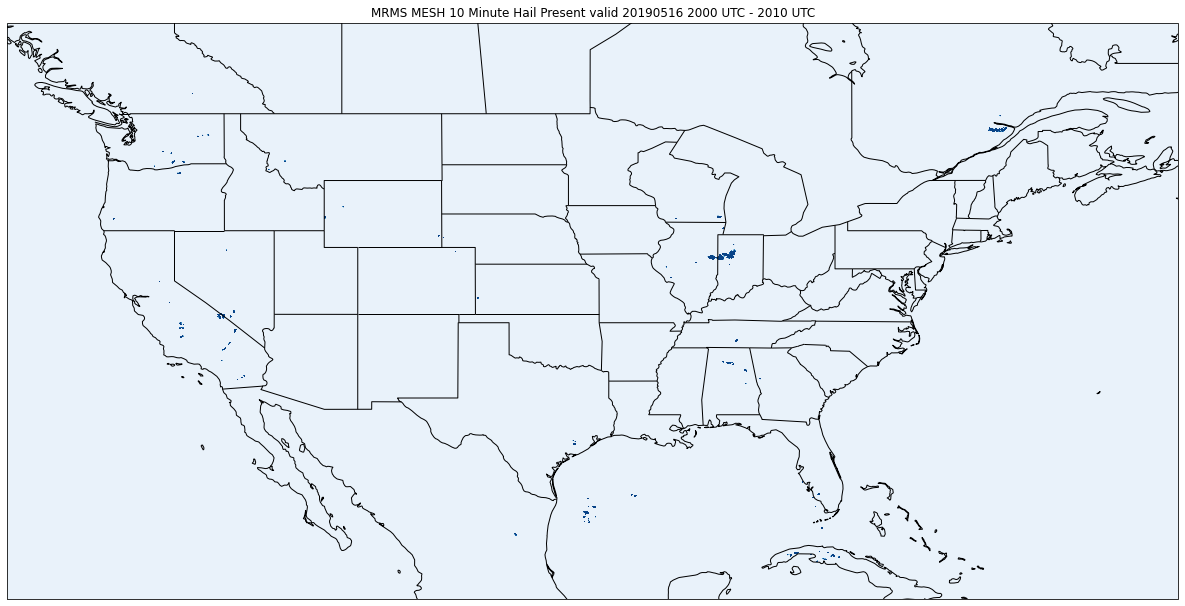

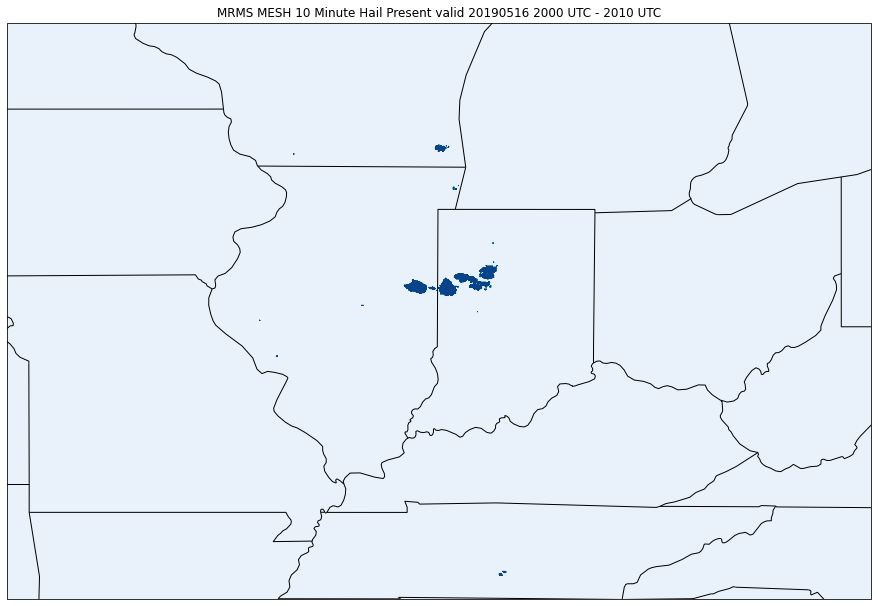

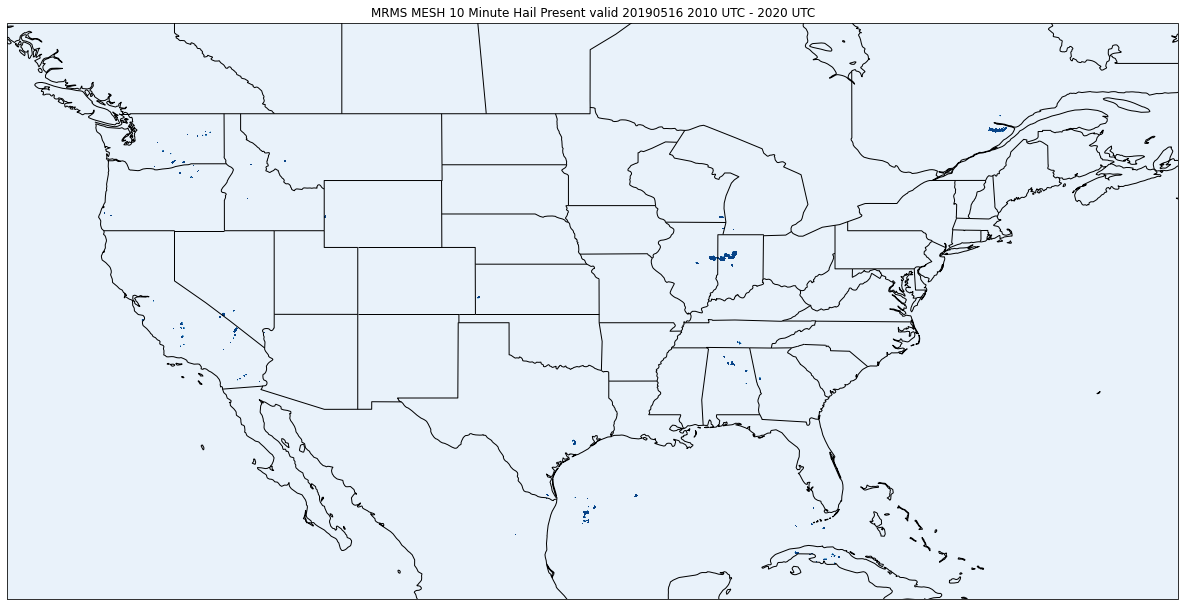

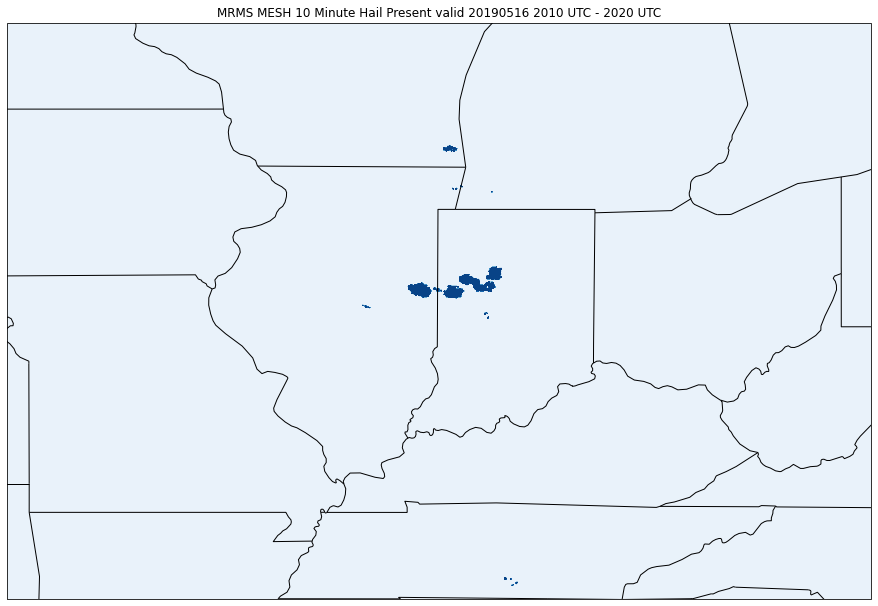

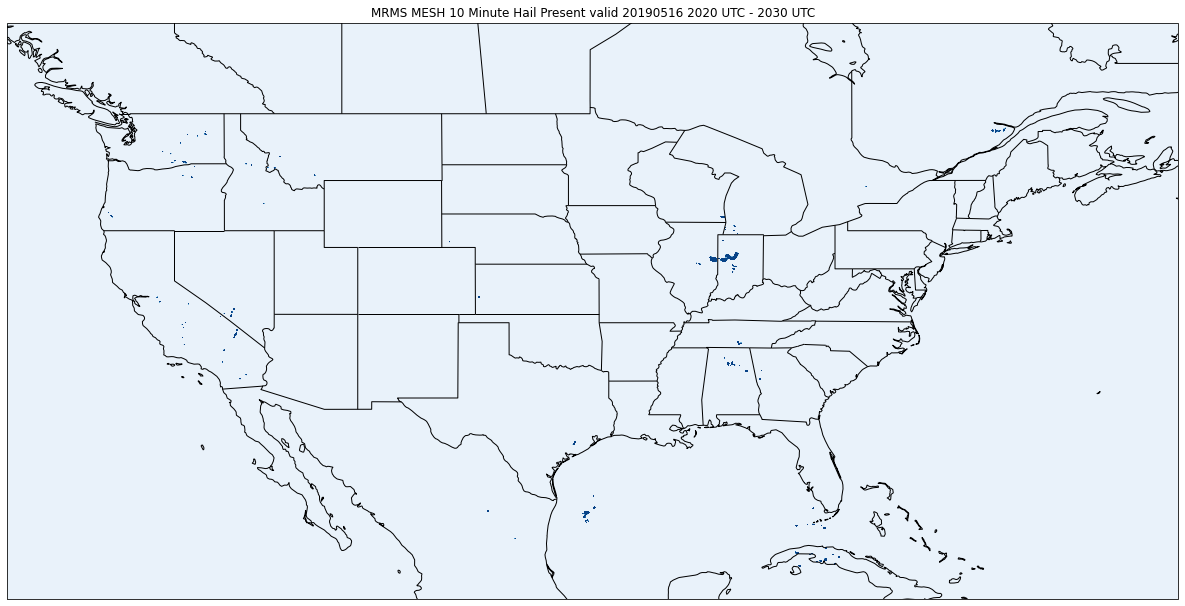

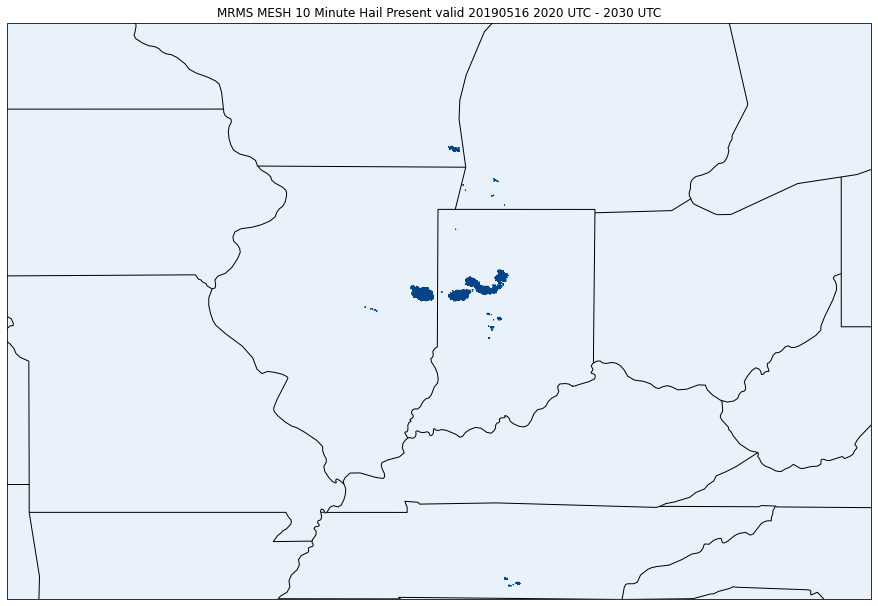

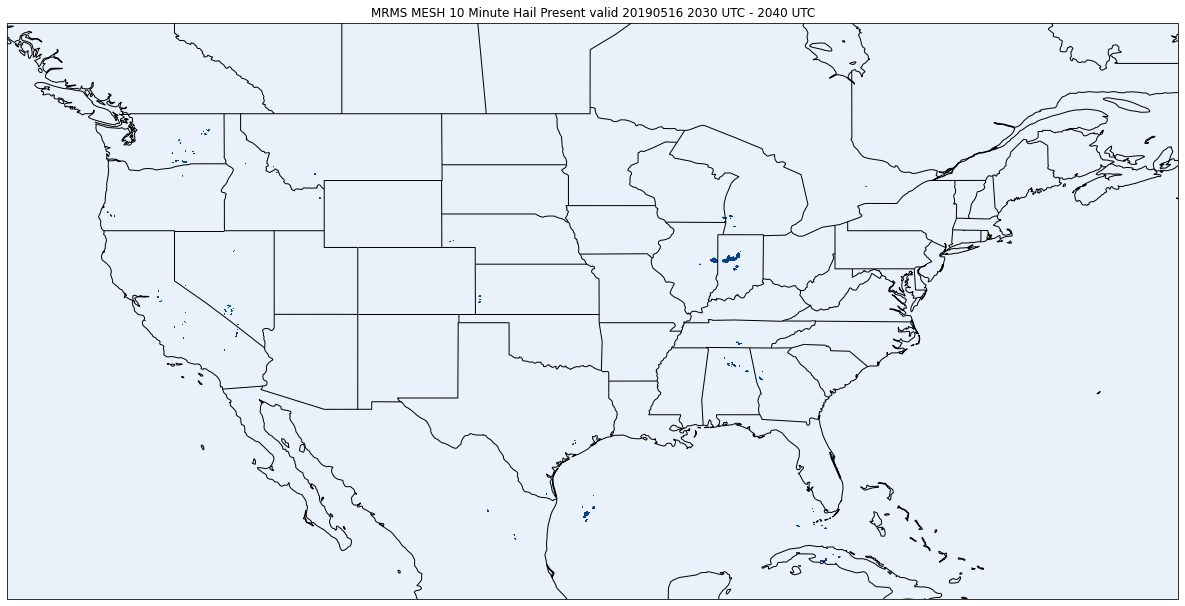

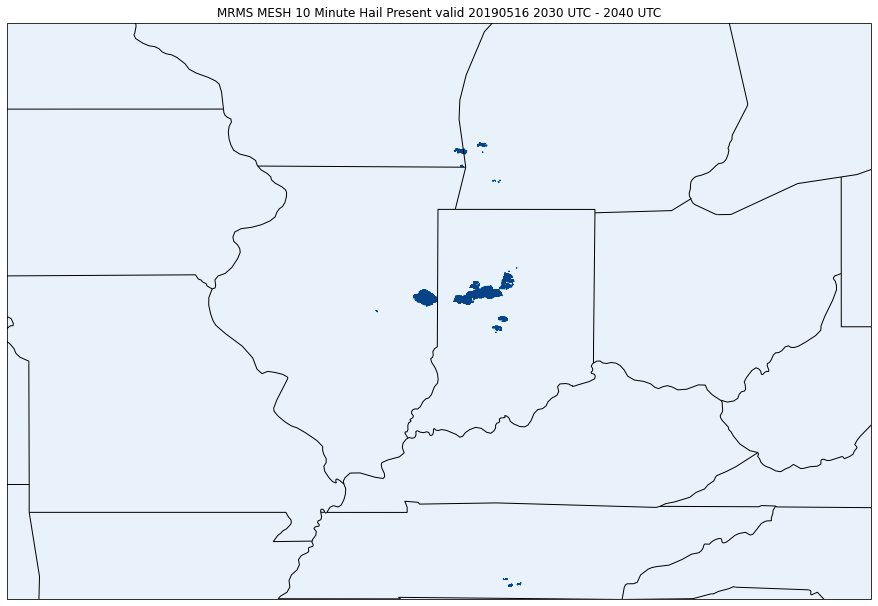

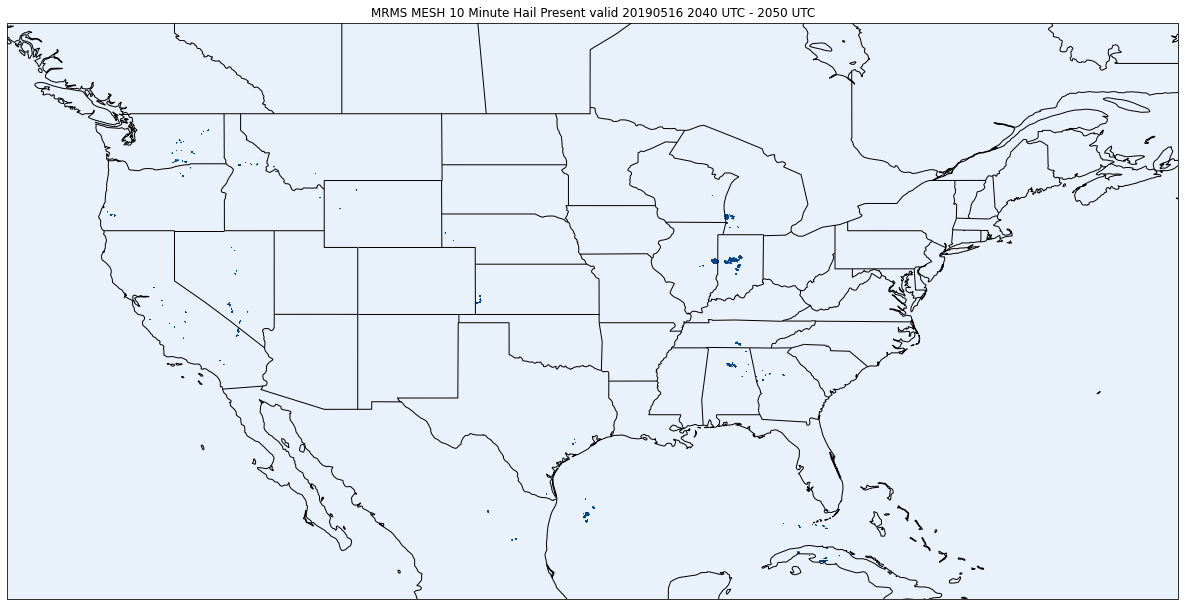

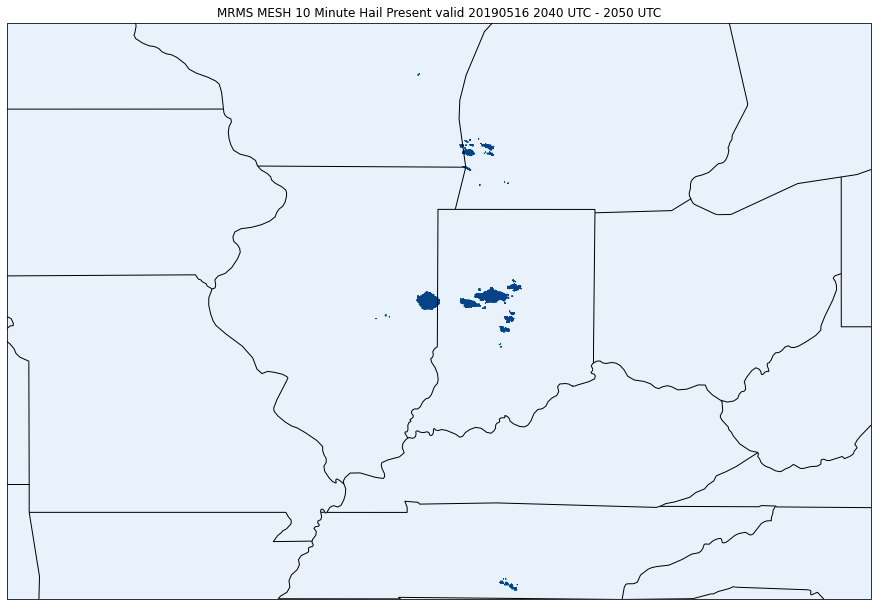

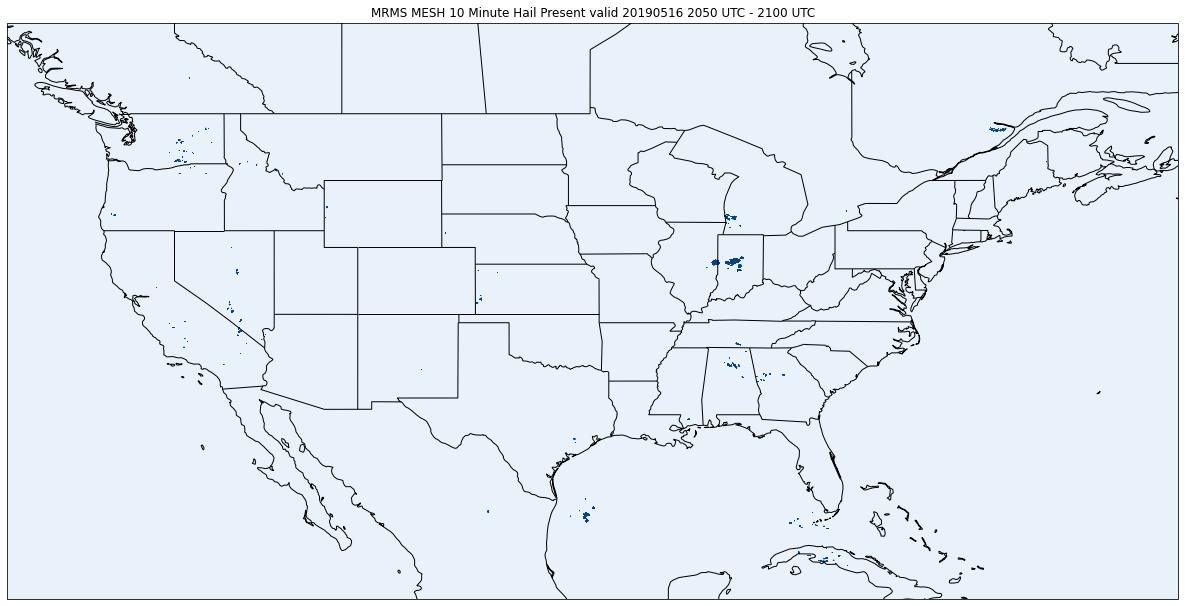

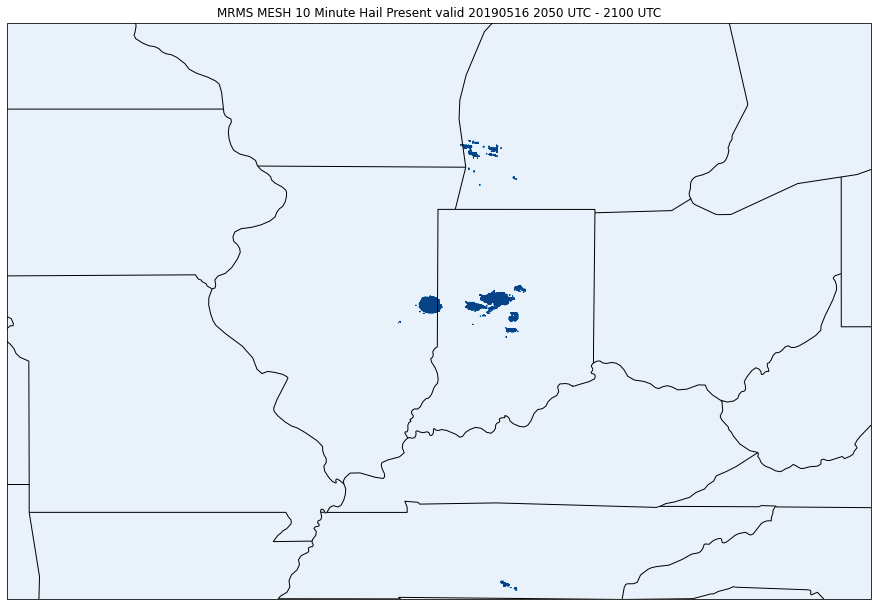

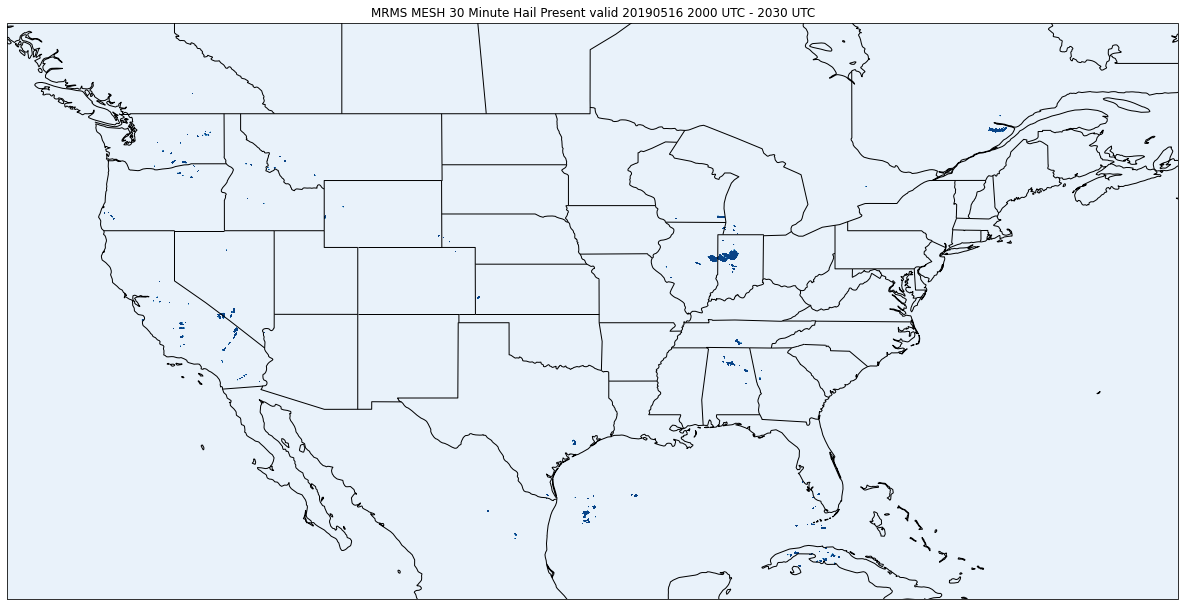

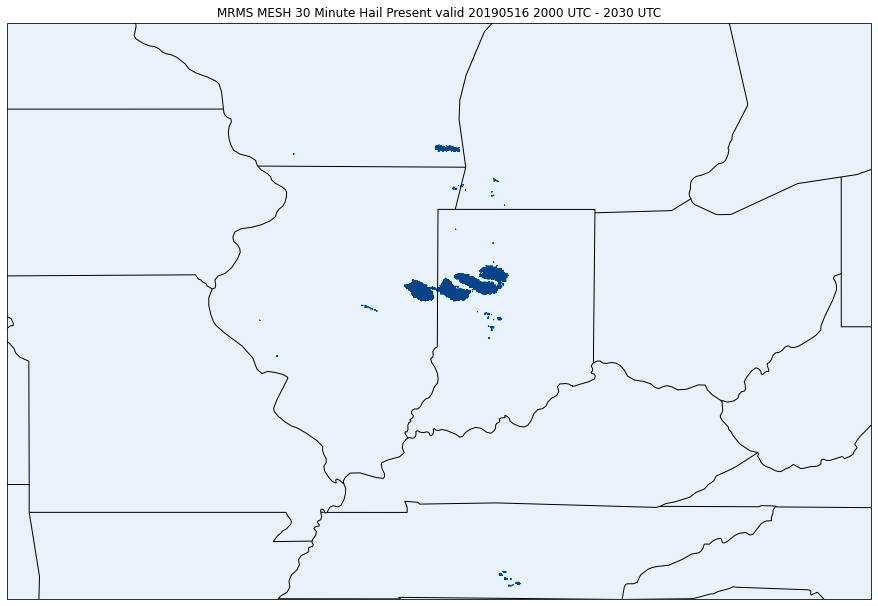

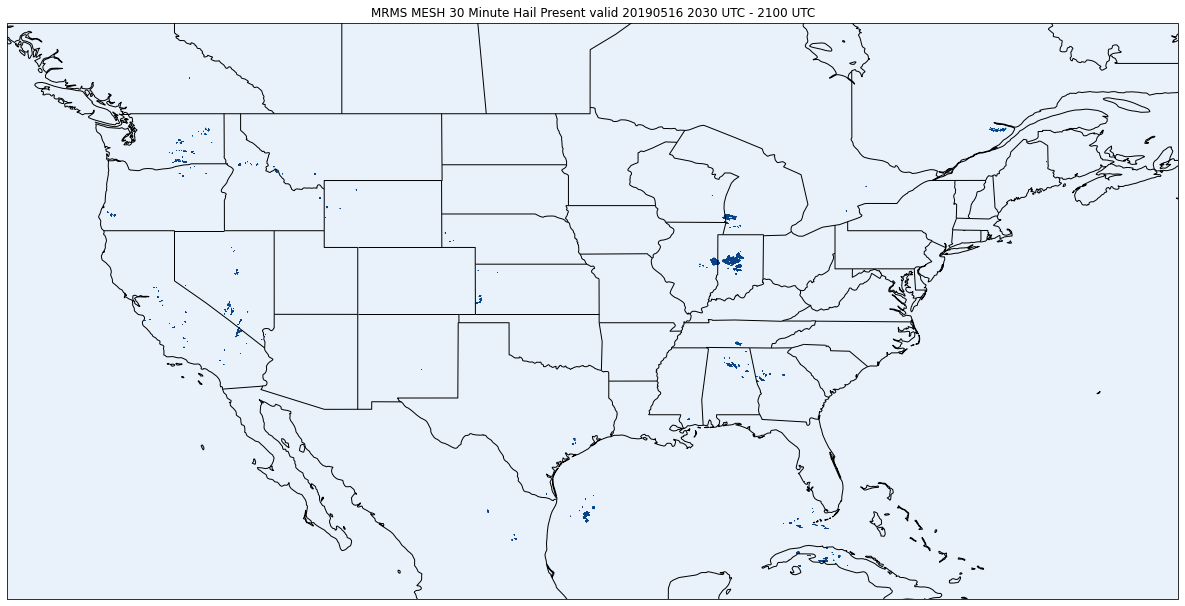

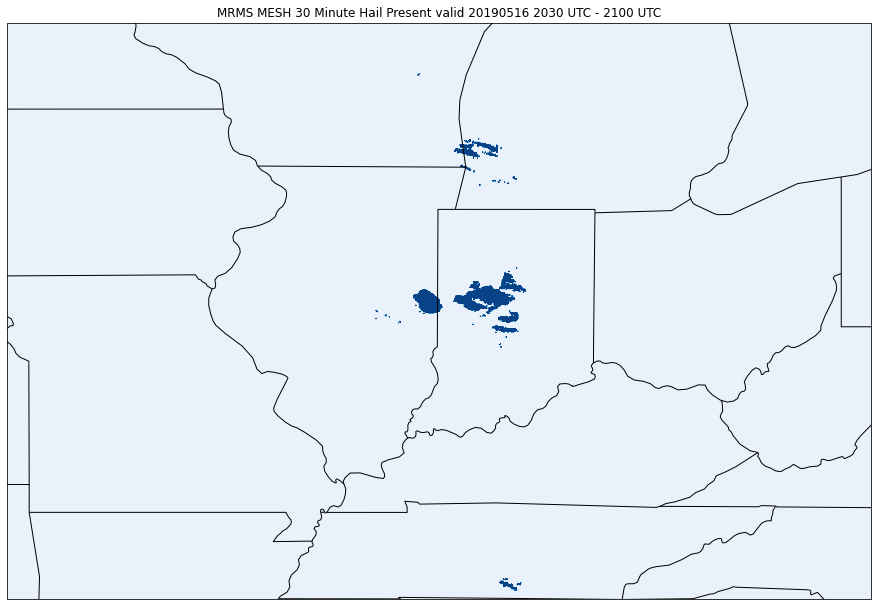

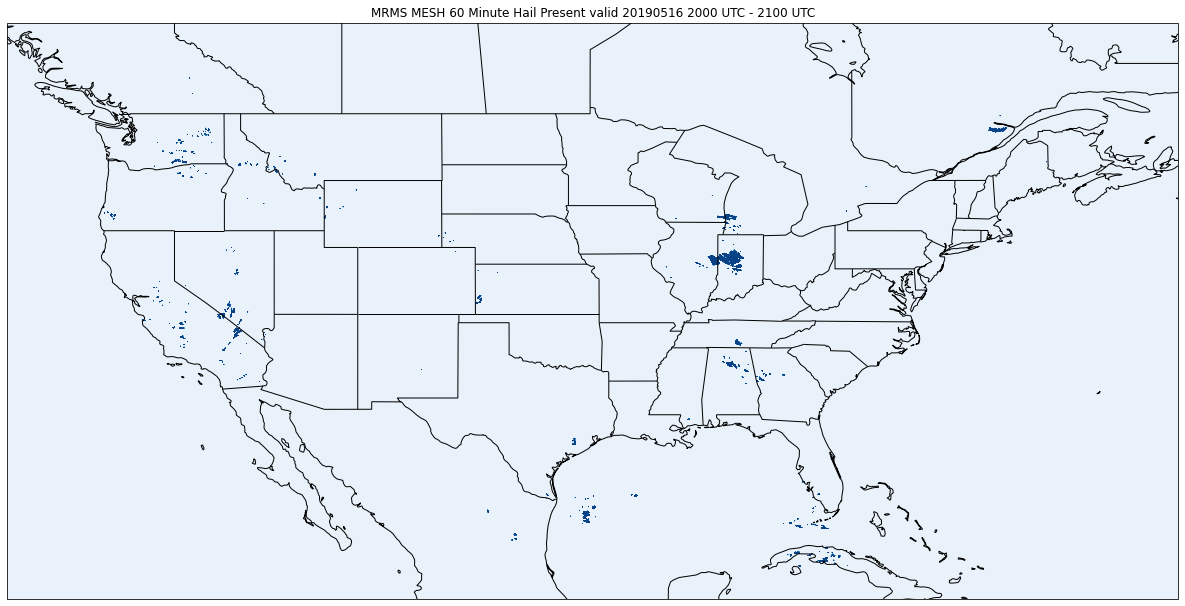

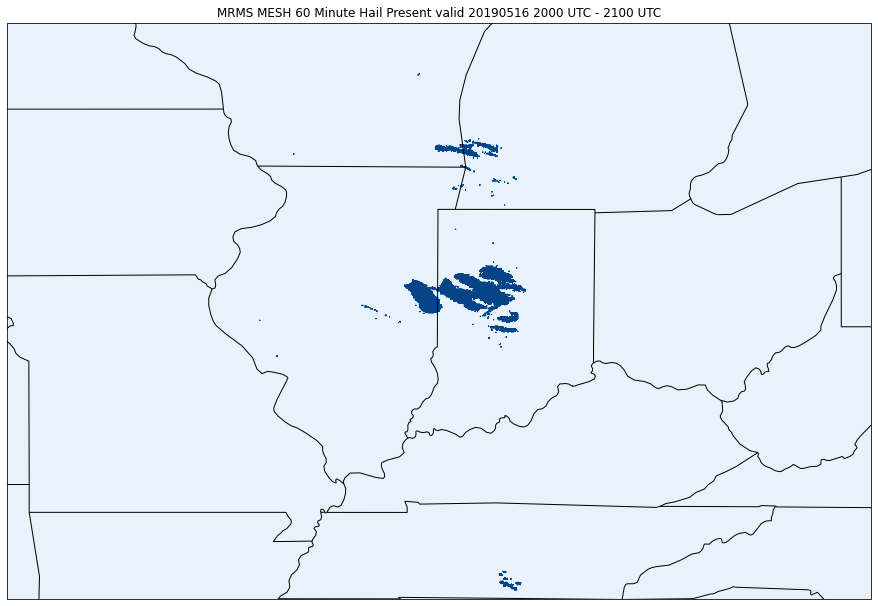

In [10]:
for i in range(len(size_list)):
    mins = minutes_list[i]
    size = size_list[i]
    
    #maximum
    mesh_bool = mesh.coarsen(valid_time=int(mins/2)).max()>0
    for time in range(size):
        for z in range(len(zoom_types)):
            zoom = zoom_types[z]
            zoom_extent = zoom_extents[z]
            
            fig = plt.figure()
            fig.set_size_inches(20,8)
            ax = plt.axes([0.,0.,1,1], projection=ccrs.PlateCarree())
            ax.add_feature(cp.feature.BORDERS)
            ax.add_feature(cp.feature.COASTLINE)
            ax.add_feature(states_provinces)
            ax.set_extent(zoom_extent)
            
            plot = ax.contourf(mesh_bool.longitude,
                               mesh_bool.latitude,
                               mesh_bool.isel(valid_time=time).values,
                               cmap="Blues",
                               #vmax=cbar_max,
                               #vmin=0,
                               transform=ccrs.PlateCarree())
            
            #colbar = plt.colorbar(plot,orientation='vertical')
            #colbar.set_label('MESH [mm]',rotation='vertical',fontsize='medium')
            
            titlestr = 'MRMS MESH ' + str(mins) + ' Minute Hail Present valid 20190516 ' + timestring[i][time]
            ax.set_title(titlestr, fontsize='large')
            
            plt.savefig("2019_05_16_figures/MESH_Boolean_" + zoom + '_' + str(mins) + '.' + str(time) + '_Minute.png',bbox_inches='tight')

### Bool=1 Average MESH

In [11]:
mesh.values = mesh.values.replace(0, np.nan)

for i in range(len(size_list)):
    mins = minutes_list[i]
    size = size_list[i]
    
    
    mesh_nanmean = mesh.coarsen(valid_time=int(mins/2)).nanmean()
    for time in range(size):
        for z in range(len(zoom_types)):
            zoom = zoom_types[z]
            zoom_extent = zoom_extents[z]
            
            fig = plt.figure()
            fig.set_size_inches(20,8)
            ax = plt.axes([0.,0.,1,1], projection=ccrs.PlateCarree())
            ax.add_feature(cp.feature.BORDERS)
            ax.add_feature(cp.feature.COASTLINE)
            ax.add_feature(states_provinces)
            ax.set_extent(zoom_extent)
            
            plot = ax.contourf(mesh_nanmean.longitude,
                               mesh_nanmean.latitude,
                               mesh_nanmean.isel(valid_time=time).values,
                               cmap="Blues",
                               vmin=0,
                               vmax=cbar_max,
                               transform=ccrs.PlateCarree())
            
            colbar = plt.colorbar(plot,orientation='vertical')
            colbar.set_label('MESH',rotation='vertical',fontsize='medium')
            
            titlestr = 'MRMS MESH ' + str(mins) + ' Minute Hail Size when Present valid 20190516 ' + timestring[i][time]
            ax.set_title(titlestr, fontsize='large')
            
            plt.savefig("2019_05_16_figures/MESH_NAN_mean_" + zoom + '_' + str(mins) + '.' + str(time) + '_Minute.png',bbox_inches='tight')

AttributeError: 'numpy.ndarray' object has no attribute 'replace'